In [23]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2
from data import soccer_net

from image import image

In [2]:
annot = loadmat("data/bmvc17/annotation_1.mat")
annotations = annot["annot"][0][0][0]
annotations

array([[  86.,  457.,  116.,  525.],
       [ 148.,  216.,  163.,  257.],
       [ 297.,  242.,  314.,  285.],
       [ 414.,  262.,  429.,  307.],
       [ 501.,  273.,  522.,  319.],
       [ 497.,  232.,  519.,  270.],
       [ 519.,  238.,  539.,  279.],
       [ 575.,  347.,  598.,  403.],
       [ 665.,  296.,  687.,  350.],
       [ 725.,  262.,  739.,  299.],
       [ 571.,  172.,  589.,  202.],
       [ 531.,  132.,  543.,  163.],
       [ 768.,  180.,  782.,  216.],
       [ 859.,  217.,  874.,  255.],
       [ 876.,  230.,  893.,  272.],
       [ 964.,  240.,  980.,  285.],
       [ 910.,  331.,  930.,  385.],
       [ 984.,  382., 1006.,  435.],
       [1000.,  337., 1023.,  391.],
       [1164.,  336., 1184.,  389.],
       [1215.,  206., 1235.,  243.]])

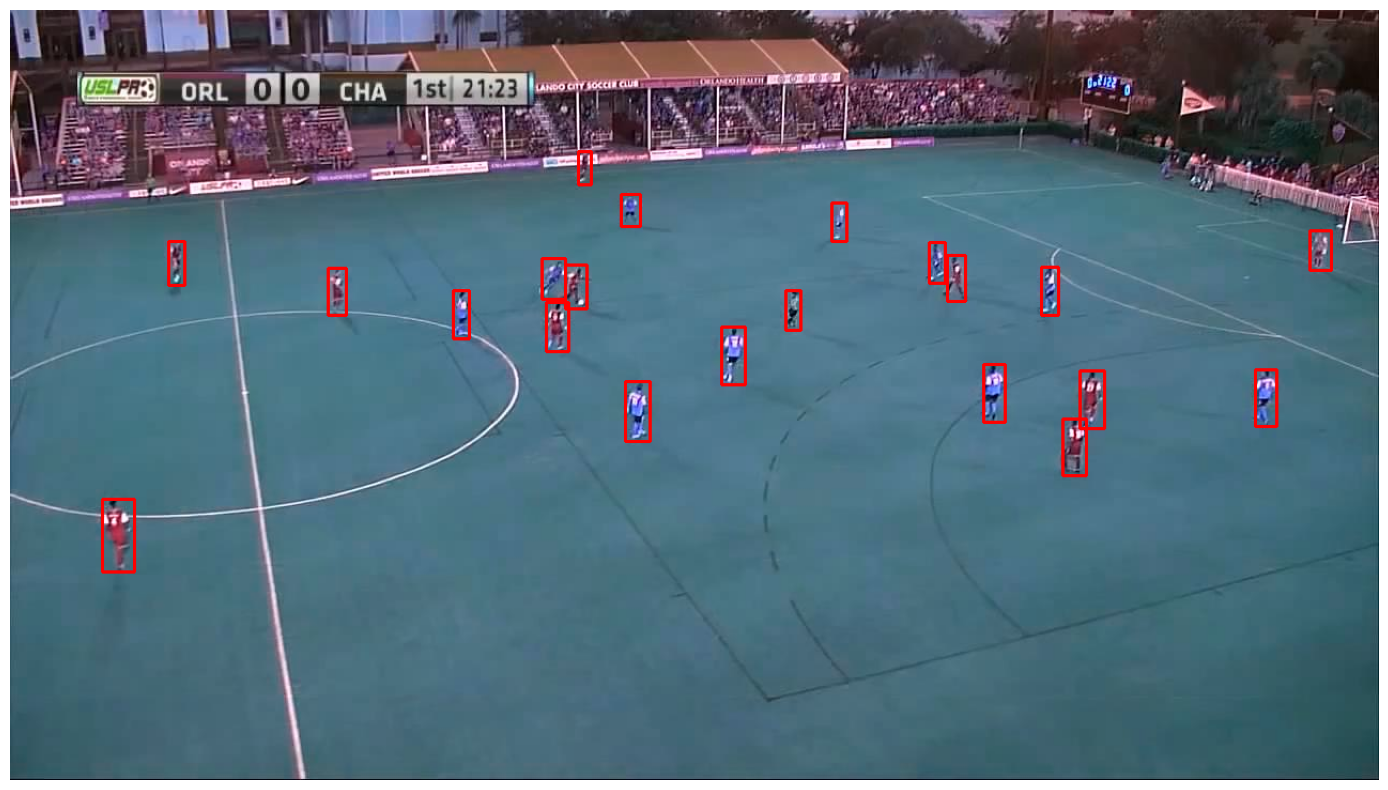

In [3]:

img = cv2.imread(f"data/bmvc17/DataSet_001/0186.jpg")
img = image.draw_bboxes(img, annotations, image.Color.RED)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

In [73]:
from collections import defaultdict
import os
import csv

def collect(directory: str):
    """Collects data from soccer net data sets"""

    soccer_net_path = os.getenv("SOCCER_NET_PATH")
    assert soccer_net_path, "missing env SOCCER_NET_PATH"

    abs_path = os.path.join(soccer_net_path, directory)

    annotation_files = []
    image_annotations = defaultdict(list)

    for subdir in os.listdir(abs_path):
        if "SNMOT" in subdir:
            for file_ in os.listdir(os.path.join(abs_path, subdir, "det")):
                annotation_files.append(os.path.join(directory, subdir, "det", file_))
    
    for annotated_file in annotation_files:
        st, sample = annotated_file.split("/")[:-2]
        imgpath = "{0:s}/{1:s}/img1/{2:0>6d}.jpg"
        with open(os.path.join(soccer_net_path, annotated_file), "r", encoding="utf-8") as rfile:
            for row in csv.reader(rfile.readlines()):
                frame, _, x, y, w, h = [int(x) for x in row[:6]]
                image_annotations[imgpath.format(st, sample, frame)].append((x, y, w, h))

    return image_annotations

In [13]:
from data import soccer_net
import cv2
from image import image

os.environ["SOCCER_NET_PATH"] = "/Users/aleksandernagaj/DTU/02456/data/soccer_net/tracking/"

annot = soccer_net.collect("test")

In [15]:
for img_path, ann in annot.items():
    print(ann)
    img = cv2.imread(os.environ["SOCCER_NET_PATH"] + img_path)
    image.draw_bboxes(img, annot, image.Color.RED)

    plt.figure(figsize=(20, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    break

[(909, 483, 956, 614), (390, 343, 428, 449), (8, 328, 47, 427), (255, 524, 308, 678), (759, 521, 801, 659), (384, 841, 458, 1077), (0, 667, 110, 838), (113, 329, 146, 423), (735, 234, 773, 320), (1530, 528, 1575, 668), (1255, 608, 1277, 632), (1227, 605, 1279, 792)]


AttributeError: 'collections.defaultdict' object has no attribute 'shape'